In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import shap

from features import HousePriceFeatureBuilder
from features.split_data_type import SplitDataType

e:\Programming\study\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('HousePrice_train.csv')
scaler = MinMaxScaler()
train_builder = HousePriceFeatureBuilder(df, SplitDataType.TRAIN, scaler)
random_state = 0

In [4]:
train_builder.drop_id()

In [5]:
train_builder.df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
train_builder.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
train_builder.drop_duplicates()

# Null filling

In [8]:
train_builder.df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
LandSlope          0
dtype: int64

In [9]:
train_builder.df['MiscFeature'].value_counts()
# перероблю в HasAdditionalFeature

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [10]:
train_builder.df[train_builder.df['MasVnrArea'].isnull()].head()
# 8 значень, заповню 0, по всюди немає обліцовки

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial


In [11]:
train_builder.df[train_builder.df['LotFrontage'].isnull()].head()
# Перетворю в чи є інфа, бо є інші х-ка для показу розмірів

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal


In [12]:
train_builder.fill_null_columns();

In [13]:
train_builder.df.isnull().sum().sort_values(ascending=False).head()

Fence           1179
FireplaceQu      690
GarageCond        81
GarageFinish      81
GarageQual        81
dtype: int64

In [14]:
train_builder.df['HasAdditionalFeature'].value_counts()

HasAdditionalFeature
1    1406
0      54
Name: count, dtype: int64

# Encoding

In [15]:
train_builder.df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasAdditionalFeature,LotFrontage_missing,HasPool
0,60,RL,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,1,0,1
1,20,RL,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NoMasonry,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,1,0,1
2,60,RL,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,1,0,1
3,70,RL,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NoMasonry,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,1,0,1
4,60,RL,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,1,0,1


In [16]:
train_builder.encode()
train_builder.df.isnull().sum().sort_values(ascending=False).head()

Fence_neutral    0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
dtype: int64

# Normalization

In [17]:
train_builder.df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HasAdditionalFeature,LotFrontage_missing,HasPool,Alley_Grvl,Alley_Pave,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C,MSZoning_FV,MSZoning_I,MSZoning_RH,MSZoning_RL,MSZoning_RP,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,Utilities_NoSeWa,Utilities_ELO,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRNn,Condition2_RRAn,Condition2_RRNe,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SFLiv,HouseStyle_2.5Fin,HouseStyle_1.5Fin,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Sal,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_2Types,PavedDrive_P,PavedDrive_Y,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleType_CWD,SaleType_VWD,SaleType_COD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual_positive,ExterQual_negative,ExterQual_neutral,ExterCond_positive,ExterCond_negative,ExterCond_neutral,BsmtQual_positive,BsmtQual_negative,BsmtQual_neutral,BsmtCond_positive,BsmtCond_negative,BsmtCond_neutral,HeatingQC_positive,HeatingQC_negative,HeatingQC_neutral,KitchenQual_positive,KitchenQual_negative,KitchenQual_neutral,FireplaceQu_positive,FireplaceQu_negative,FireplaceQu_neutral,GarageQual_positive,GarageQual_negative,GarageQual_neutral,Garag

In [18]:
train_builder.df.dtypes.value_counts()

int8       227
int64       34
float64      2
Name: count, dtype: int64

In [19]:
train_builder.normalize()
train_builder.df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HasAdditionalFeature,LotFrontage_missing,HasPool,Alley_Grvl,Alley_Pave,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C,MSZoning_FV,MSZoning_I,MSZoning_RH,MSZoning_RL,MSZoning_RP,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,Utilities_NoSeWa,Utilities_ELO,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRNn,Condition2_RRAn,Condition2_RRNe,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SFLiv,HouseStyle_2.5Fin,HouseStyle_1.5Fin,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Sal,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_2Types,PavedDrive_P,PavedDrive_Y,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleType_CWD,SaleType_VWD,SaleType_COD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual_positive,ExterQual_negative,ExterQual_neutral,ExterCond_positive,ExterCond_negative,ExterCond_neutral,BsmtQual_positive,BsmtQual_negative,BsmtQual_neutral,BsmtCond_positive,BsmtCond_negative,BsmtCond_neutral,HeatingQC_positive,HeatingQC_negative,HeatingQC_neutral,KitchenQual_positive,KitchenQual_negative,KitchenQual_neutral,FireplaceQu_positive,FireplaceQu_negative,FireplaceQu_neutral,GarageQual_positive,GarageQual_negative,GarageQual_neutral,Garag

In [20]:
train_builder.df.dtypes.value_counts()  

int8       227
float64     34
int64        2
Name: count, dtype: int64

# Кореляція

In [21]:
train_builder.get_high_correlation_features()

SaleType_New             1.760499
SaleCondition_Partial    1.756378
2ndFlrSF                 1.597899
SaleType_WD              1.543240
PoolArea                 0.989665
HasPool                  0.989665
Exterior1st_VinylSd      0.977525
Exterior2nd_VinylSd      0.977525
Exterior2nd_MetalSd      0.973065
Exterior1st_MetalSd      0.973065
RoofStyle_Hip            0.933462
RoofStyle_Gable          0.933462
Exterior1st_HdBoard      0.883271
Exterior2nd_HdBoard      0.883271
GarageCars               0.882475
GarageArea               0.882475
Neighborhood_Somerst     0.862807
MSZoning_FV              0.862807
Exterior2nd_Wd Sdng      0.859244
Exterior1st_Wd Sdng      0.859244
Electrical_SBrkr         0.857283
Electrical_FuseA         0.857283
Exterior1st_AsbShng      0.847917
Exterior2nd_AsbShng      0.847917
TotRmsAbvGrd             0.825489
GrLivArea                0.825489
1stFlrSF                 0.819530
TotalBsmtSF              0.819530
HouseStyle_2Story        0.809150
MSZoning_RL   

In [22]:
train_builder.drop_high_correlation_features()
train_builder.get_high_correlation_features()

Series([], dtype: float64)

# Model train

## Test

In [23]:
test_builder = HousePriceFeatureBuilder(pd.read_csv('HousePrice_test.csv'), SplitDataType.TEST, scaler)
test_builder.build_by_templete()
test_builder.df.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,HasAdditionalFeature,LotFrontage_missing,HasPool,Alley_Grvl,Alley_Pave,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C,MSZoning_I,MSZoning_RH,MSZoning_RL,MSZoning_RP,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,Utilities_NoSeWa,Utilities_ELO,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_RRNe,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRNn,Condition2_RRAn,Condition2_RRNe,BldgType_2fmCon,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SFLiv,HouseStyle_2.5Fin,HouseStyle_1.5Fin,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_ImStucc,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_Stone,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Sal,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_2Types,PavedDrive_P,PavedDrive_Y,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD,SaleType_CWD,SaleType_VWD,SaleType_COD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,ExterQual_positive,ExterQual_negative,ExterQual_neutral,ExterCond_positive,ExterCond_negative,ExterCond_neutral,BsmtQual_positive,BsmtQual_negative,BsmtQual_neutral,BsmtCond_positive,BsmtCond_negative,BsmtCond_neutral,HeatingQC_positive,HeatingQC_negative,HeatingQC_neutral,KitchenQual_positive,KitchenQual_negative,KitchenQual_neutral,FireplaceQu_positive,FireplaceQu_negative,FireplaceQu_neutral,GarageQual_positive,GarageQual_negative,GarageQual_neutral,GarageCond_positive,GarageCond_negative,GarageCond_neutral,BsmtExposure_positive,BsmtExposure_negative,BsmtExposure_neutral,BsmtFinType1_positive,BsmtFinType1_negative,BsmtFinType1_neutral,BsmtFinType2_positive,BsmtFinType2_negative,BsmtFinType2_neutral,GarageFinish_positive,GarageFinish_negative,GarageFinish_neutral,Fence_positive,Fence_negative,Fence_neut

In [24]:
test_builder.get_high_correlation_features()

Series([], dtype: float64)

In [25]:
# train_builder.drop_uninformed_features()
# test_builder.drop_uninformed_features()

In [26]:
X_train = train_builder.df
y_train = np.log(train_builder.target)
X_test = test_builder.df

## Linear

In [27]:
#помилки: train 0.116, test 0.388
reg = linear_model.LinearRegression()

#помилки: train 0.367, test 0.123
reg = linear_model.Lasso(alpha=0.1, random_state=random_state)

#з топ 40 від Shap-лі
#помилки: train 0.140, test 0.370 -> Стало гірше
reg = linear_model.Ridge(alpha=1.5, random_state=random_state)

#Найкраща
#помилки: train 0.121, test 0.378
reg = linear_model.Ridge(alpha=3.9, random_state=random_state)

reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.9070082558505094

In [28]:
# rf_params = {'alpha': np.arange(0.1, 10, 0.1)}
# grid_search = GridSearchCV(estimator=reg, param_grid=rf_params, scoring='neg_root_mean_squared_error')
# grid_search.fit(X_train, y_train)
# print("Best params:", grid_search.best_params_)

In [29]:
y_train_pred = reg.predict(train_builder.df)
print('Помилка на train:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
y_train_pred = np.exp(y_train_pred)

Помилка на train: 0.12176931738541769


In [30]:
sample = pd.read_csv(f'sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [31]:
y_test_pred = reg.predict(test_builder.df)
print('Помилка на test:', np.sqrt(mean_squared_error(np.log(sample['SalePrice']), y_test_pred)))
y_test_pred = np.exp(y_test_pred)

Помилка на test: 0.3784121124476395


In [32]:
sample['SalePrice'] = y_test_pred
sample.to_csv(f'submission_linear.csv', index=False)

In [33]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('Cross-validation train scores:', -scores)

Cross-validation train scores: [0.13171379 0.15370919 0.14039561 0.12854935 0.16926352]


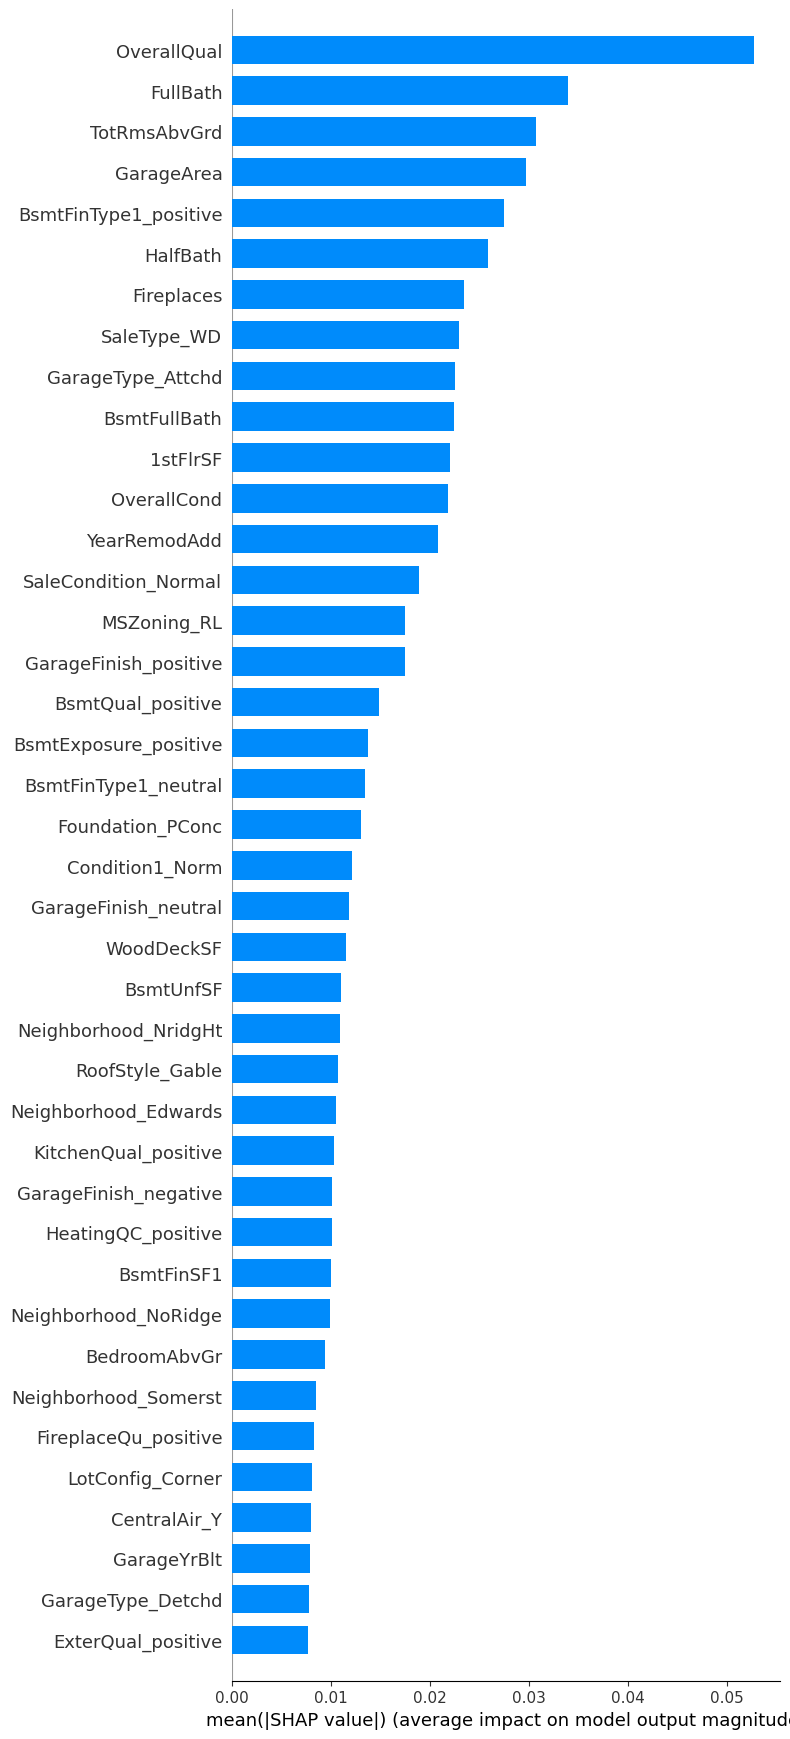

In [34]:
shap.initjs()
explainer = shap.Explainer(reg, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[:, :], X_train, plot_type="bar", max_display=40)

In [35]:
importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(importance)[::-1]
sorted_features = test_builder.df.columns[sorted_idx]
print(sorted_features[:40])

Index(['OverallQual', 'FullBath', 'TotRmsAbvGrd', 'GarageArea',
       'BsmtFinType1_positive', 'HalfBath', 'Fireplaces', 'SaleType_WD',
       'GarageType_Attchd', 'BsmtFullBath', '1stFlrSF', 'OverallCond',
       'YearRemodAdd', 'SaleCondition_Normal', 'MSZoning_RL',
       'GarageFinish_positive', 'BsmtQual_positive', 'BsmtExposure_positive',
       'BsmtFinType1_neutral', 'Foundation_PConc', 'Condition1_Norm',
       'GarageFinish_neutral', 'WoodDeckSF', 'BsmtUnfSF',
       'Neighborhood_NridgHt', 'RoofStyle_Gable', 'Neighborhood_Edwards',
       'KitchenQual_positive', 'GarageFinish_negative', 'HeatingQC_positive',
       'BsmtFinSF1', 'Neighborhood_NoRidge', 'BedroomAbvGr',
       'Neighborhood_Somerst', 'FireplaceQu_positive', 'LotConfig_Corner',
       'CentralAir_Y', 'GarageYrBlt', 'GarageType_Detchd',
       'ExterQual_positive'],
      dtype='object')


## Random Forest

In [36]:
#з shap-лі топ 40
#помилки: train 0.0552, test 0.3564 -> +- теж саме
forest = RandomForestRegressor(max_depth=14, 
                               max_features=0.3)

#помилки: train 0.0573, test 0.3506
forest = RandomForestRegressor(max_depth=14, max_features=0.3, random_state=random_state)

In [37]:
rf_params = {'max_depth': np.arange(2, 16, 2),
             'max_features': np.arange(0.3, 0.9, 0.2)}
grid_search = GridSearchCV(estimator=forest, param_grid=rf_params, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)

Best params: {'max_depth': np.int64(14), 'max_features': np.float64(0.3)}


In [38]:
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

0.9794719788982362

In [39]:
y_train_pred = forest.predict(train_builder.df)
print('Помилка на train:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
y_train_pred = np.exp(y_train_pred)

Помилка на train: 0.05721227500381384


In [40]:
sample = pd.read_csv(f'sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [41]:
y_test_pred = forest.predict(test_builder.df)
print('Помилка на test:', np.sqrt(mean_squared_error(np.log(sample['SalePrice']), y_test_pred)))
y_test_pred = np.exp(y_test_pred)

Помилка на test: 0.35490844195062443


In [42]:
sample['SalePrice'] = y_test_pred
sample.to_csv(f'submission_random_forest.csv', index=False)

In [43]:
scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('Cross-validation train scores:', -scores)

Cross-validation train scores: [0.13186567 0.15713933 0.15766299 0.13367391 0.15175424]


# Для пошуку не інформативних х-к використаю SHAP (Зміни на рівні похибки)

 98%|===================| 1428/1460 [00:46<00:01]        

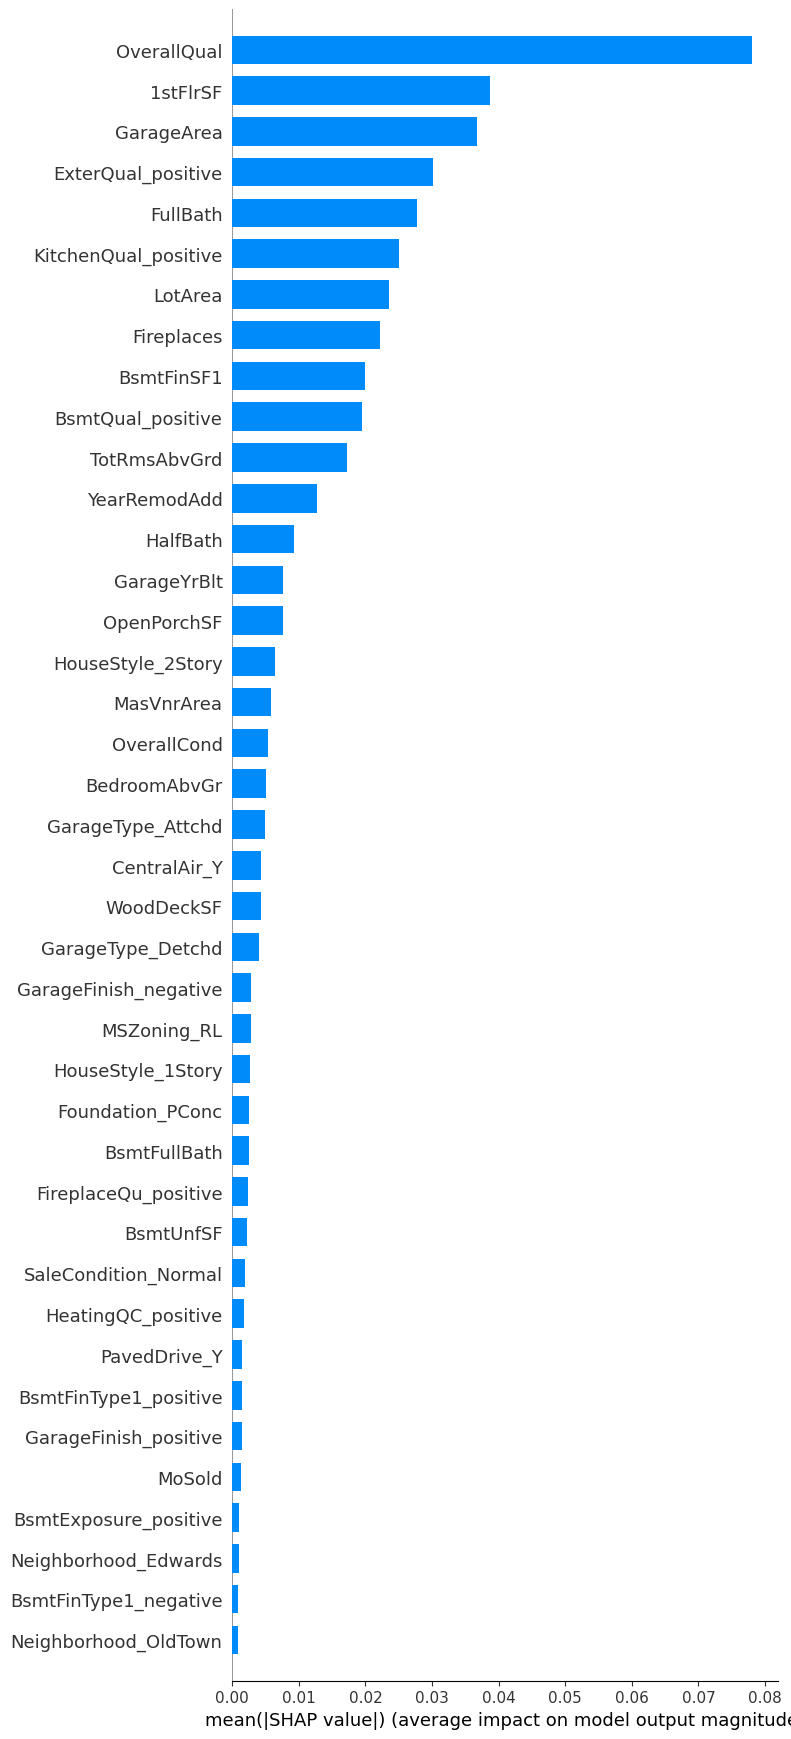

In [44]:
shap.initjs()
explainer = shap.Explainer(forest, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[:, :], X_train, plot_type="bar", max_display=40)

In [45]:
importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(importance)[::-1]
sorted_features = test_builder.df.columns[sorted_idx]
print(sorted_features[:40])

Index(['OverallQual', '1stFlrSF', 'GarageArea', 'ExterQual_positive',
       'FullBath', 'KitchenQual_positive', 'LotArea', 'Fireplaces',
       'BsmtFinSF1', 'BsmtQual_positive', 'TotRmsAbvGrd', 'YearRemodAdd',
       'HalfBath', 'GarageYrBlt', 'OpenPorchSF', 'HouseStyle_2Story',
       'MasVnrArea', 'OverallCond', 'BedroomAbvGr', 'GarageType_Attchd',
       'CentralAir_Y', 'WoodDeckSF', 'GarageType_Detchd',
       'GarageFinish_negative', 'MSZoning_RL', 'HouseStyle_1Story',
       'Foundation_PConc', 'BsmtFullBath', 'FireplaceQu_positive', 'BsmtUnfSF',
       'SaleCondition_Normal', 'HeatingQC_positive', 'PavedDrive_Y',
       'BsmtFinType1_positive', 'GarageFinish_positive', 'MoSold',
       'BsmtExposure_positive', 'Neighborhood_Edwards',
       'BsmtFinType1_negative', 'Neighborhood_OldTown'],
      dtype='object')
